In [1]:
import requests #to read and save file from Internet
import tweepy #to access Twitter api
import pandas as pd
import json
from time import sleep
import matplotlib.pyplot as plt

# 1. Gathering

In [303]:
#Save image prediction file from web to working directory

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r.raise_for_status() # ensure we notice bad responses
with open("image-predictions.tsv", 'wb') as f:
        f.write(r.content)
file.close()

In [304]:
image_df = pd.read_csv("image-predictions.tsv", sep='\t')
image_df

#https://stackoverflow.com/questions/31126596/saving-response-from-requests-to-file

tweet_id  \
0     666020888022790149   
1     666029285002620928   
2     666033412701032449   
3     666044226329800704   
4     666049248165822465   
5     666050758794694657   
6     666051853826850816   
7     666055525042405380   
8     666057090499244032   
9     666058600524156928   
10    666063827256086533   
11    666071193221509120   
12    666073100786774016   
13    666082916733198337   
14    666094000022159362   
15    666099513787052032   
16    666102155909144576   
17    666104133288665088   
18    666268910803644416   
19    666273097616637952   
20    666287406224695296   
21    666293911632134144   
22    666337882303524864   
23    666345417576210432   
24    666353288456101888   
25    666362758909284353   
26    666373753744588802   
27    666396247373291520   
28    666407126856765440   
29    666411507551481857   
...                  ...   
2045  886366144734445568   
2046  886680336477933568   
2047  886736880519319552   
2048  886983233522544640   
2049  887101392804085760   
2050  887343217045368832   
2051  887473957103951883   
2052  887517139158093824   
2053  887705289381826560   
2054  888078434458587136   
2055  888202515573088257   
2056  888554962724278272   
2057  888804989199671297   
2058  888917238123831296   
2059  889278841981685760   
2060  889531135344209921   
2061  889638837579907072   
2062  889665388333682689   
2063  889880896479866881   
2064  890006608113172480   
2065  890240255349198849   
2066  890609185150312448   
2067  890729181411237888   
2068  890971913173991426   
2069  891087950875897856   
2070  891327558926688256   
2071  891689557279858688   
2072  891815181378084864   
2073  892177421306343426   
2074  892420643555336193   

                                                                                      jpg_url  \
0     https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg                                           
1     https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg                                           
2     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg                                           
3     https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg                                           
4     https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg                                           
5     https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg                                           
6     https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg                                           
7     https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg                                           
8     https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg                                           
9     https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg                                           
10    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg                                           
11    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg                                           
12    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg                                           
13    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg                                           
14    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg                                           
15    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg                                           
16    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg                                           
17    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg                                           
18    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg                                           
19    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg                                           
20    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg                                           
21    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg                                           
22    https://pbs.twimg.com/media/CT9OwFIWEAMuRj

In [305]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [306]:
archive_df=pd.read_csv("twitter-archive-enhanced.csv")
archive_df


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193 NaN                    NaN                    
1     892177421306343426 NaN                    NaN                    
2     891815181378084864 NaN                    NaN                    
3     891689557279858688 NaN                    NaN                    
4     891327558926688256 NaN                    NaN                    
5     891087950875897856 NaN                    NaN                    
6     890971913173991426 NaN                    NaN                    
7     890729181411237888 NaN                    NaN                    
8     890609185150312448 NaN                    NaN                    
9     890240255349198849 NaN                    NaN                    
10    890006608113172480 NaN                    NaN                    
11    889880896479866881 NaN                    NaN                    
12    889665388333682689 NaN                    NaN                    
13    889638837579907072 NaN                    NaN                    
14    889531135344209921 NaN                    NaN                    
15    889278841981685760 NaN                    NaN                    
16    888917238123831296 NaN                    NaN                    
17    888804989199671297 NaN                    NaN                    
18    888554962724278272 NaN                    NaN                    
19    888202515573088257 NaN                    NaN                    
20    888078434458587136 NaN                    NaN                    
21    887705289381826560 NaN                    NaN                    
22    887517139158093824 NaN                    NaN                    
23    887473957103951883 NaN                    NaN                    
24    887343217045368832 NaN                    NaN                    
25    887101392804085760 NaN                    NaN                    
26    886983233522544640 NaN                    NaN                    
27    886736880519319552 NaN                    NaN                    
28    886680336477933568 NaN                    NaN                    
29    886366144734445568 NaN                    NaN                    
...                  ...  ..                     ..                    
2326  666411507551481857 NaN                    NaN                    
2327  666407126856765440 NaN                    NaN                    
2328  666396247373291520 NaN                    NaN                    
2329  666373753744588802 NaN                    NaN                    
2330  666362758909284353 NaN                    NaN                    
2331  666353288456101888 NaN                    NaN                    
2332  666345417576210432 NaN                    NaN                    
2333  666337882303524864 NaN                    NaN                    
2334  666293911632134144 NaN                    NaN                    
2335  666287406224695296 NaN                    NaN                    
2336  666273097616637952 NaN                    NaN                    
2337  666268910803644416 NaN                    NaN                    
2338  666104133288665088 NaN                    NaN                    
2339  666102155909144576 NaN                    NaN                    
2340  666099513787052032 NaN                    NaN                    
2341  666094000022159362 NaN                    NaN                    
2342  666082916733198337 NaN                    NaN                    
2343  666073100786774016 NaN                    NaN                    
2344  666071193221509120 NaN                    NaN                    
2345  666063827256086533 NaN                    NaN                    
2346  666058600524156928 NaN                    NaN                    
2347  666057090499244032 NaN                    NaN                    
2348  666055525042405380 NaN                    NaN                    
2349  666051853826850816 NaN                    NaN     

In [307]:
archive_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [308]:
archive_df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03  7.800000e+01           7.800000e+01          
mean   7.427716e+17  7.455079e+17           2.014171e+16          
std    6.856705e+16  7.582492e+16           1.252797e+17          
min    6.660209e+17  6.658147e+17           1.185634e+07          
25%    6.783989e+17  6.757419e+17           3.086374e+08          
50%    7.196279e+17  7.038708e+17           4.196984e+09          
75%    7.993373e+17  8.257804e+17           4.196984e+09          
max    8.924206e+17  8.862664e+17           8.405479e+17          

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count  1.810000e+02         1.810000e+02              2356.000000        
mean   7.720400e+17         1.241698e+16              13.126486          
std    6.236928e+16         9.599254e+16              45.876648          
min    6.661041e+17         7.832140e+05              0.000000           
25%    7.186315e+17         4.196984e+09              10.000000          
50%    7.804657e+17         4.196984e+09              11.000000          
75%    8.203146e+17         4.196984e+09              12.000000          
max    8.874740e+17         7.874618e+17              1776.000000        

       rating_denominator  
count  2356.000000         
mean   10.455433           
std    6.745237            
min    0.000000            
25%    10.000000           
50%    10.000000           
75%    10.000000           
max    170.000000

In [309]:
#Access Twitter API

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [310]:
tweet_id = pd.Series(archive_df['tweet_id'].values)
#tweet_id=tweet_id[0:2]
#tweet_id
status_errors = []
with open('tweet_json.txt', 'w') as outfile:
    for i in tweet_id:
        try:
            tweet = api.get_status(i, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')            
            #remaining = int(api.last_response.headers['x-rate-limit-remaining'])
            #if remaining <= 10:
            #    sleep(60*17)

        except tweepy.TweepError:
            status_errors.append(i)
       

Rate limit reached. Sleeping for: 600
Rate limit reached. Sleeping for: 698


In [311]:
status_errors

[888202515573088257,
 873697596434513921,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464,
 671122204919246848,
 671115716440031232,
 671109016219725825,
 670995969505435648,
 670842764863651840,
 670840546554966016,
 670838202509447168,
 670833812859932673,
 670832455012716544,
 670826280409919488,
 670823764196741120,
 670468609693655041,
 670452855871037440,
 670442337873600512,
 670435821946826752]

In [312]:
int(api.last_response.headers['x-rate-limit-remaining'])

185

In [313]:
cols = ['tweet_id', 'retweet_count', 'favorite_count','source']
lst = [] 

with open('tweet_json.txt') as fp:  
    line = fp.readline()
    while line:
            p=json.loads(line)
            lst.append([p['id'], p['retweet_count'], p['favorite_count'],p['source']])
            line = fp.readline()
api_df = pd.DataFrame(lst, columns=cols)
api_df   

tweet_id  retweet_count  favorite_count  \
0     892420643555336193  8699           39117            
1     892177421306343426  6387           33502            
2     891815181378084864  4241           25252            
3     891689557279858688  8798           42478            
4     891327558926688256  9577           40638            
5     891087950875897856  3178           20383            
6     890971913173991426  2116           11950            
7     890729181411237888  19276          66091            
8     890609185150312448  4338           27988            
9     890240255349198849  7566           32206            
10    890006608113172480  7478           30871            
11    889880896479866881  5061           27998            
12    889665388333682689  10257          48362            
13    889638837579907072  4632           27395            
14    889531135344209921  2272           15219            
15    889278841981685760  5546           25499            
16    888917238123831296  4593           29314            
17    888804989199671297  4447           25801            
18    888554962724278272  3668           20096            
19    888078434458587136  3583           21950            
20    887705289381826560  5502           30440            
21    887517139158093824  11887          46578            
22    887473957103951883  18605          69687            
23    887343217045368832  10597          33939            
24    887101392804085760  6077           30810            
25    886983233522544640  7924           35487            
26    886736880519319552  3364           12184            
27    886680336477933568  4551           22611            
28    886366144734445568  3249           21294            
29    886267009285017600  4              117              
...                  ... ..              ...              
2301  666411507551481857  334            454              
2302  666407126856765440  42             112              
2303  666396247373291520  88             170              
2304  666373753744588802  95             192              
2305  666362758909284353  581            789              
2306  666353288456101888  74             227              
2307  666345417576210432  143            304              
2308  666337882303524864  95             201              
2309  666293911632134144  363            513              
2310  666287406224695296  68             151              
2311  666273097616637952  79             179              
2312  666268910803644416  36             104              
2313  666104133288665088  6747           14540            
2314  666102155909144576  13             80               
2315  666099513787052032  71             159              
2316  666094000022159362  76             166              
2317  666082916733198337  45             120              
2318  666073100786774016  172            327              
2319  666071193221509120  64             152              
2320  666063827256086533  225            486              
2321  666058600524156928  58             114              
2322  666057090499244032  143            302              
2323  666055525042405380  258            444              
2324  666051853826850816  864            1239             
2325  666050758794694657  59             134              
2326  666049248165822465  40             108              
2327  666044226329800704  143            304              
2328  666033412701032449  46             126              
2329  666029285002620928  47             130              
2330  666020888022790149  518            2527             

                                                                                  source  
0     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  
1     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  
2     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone

In [314]:
    
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
source            2331 non-null object
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [315]:
api_df.source.value_counts(sort=True)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2196
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [347]:
api_df.favorite_count.value_counts().sort_index()

0         171
51        1  
72        1  
80        1  
86        1  
104       1  
105       1  
108       1  
112       1  
114       1  
115       1  
117       1  
120       2  
126       1  
127       1  
129       2  
130       1  
134       1  
149       1  
151       1  
152       1  
157       1  
159       1  
166       1  
167       1  
168       1  
170       1  
171       1  
179       1  
190       1  
         ..  
49335     1  
49713     1  
49857     1  
50983     1  
53969     1  
54135     1  
55019     1  
56625     1  
56855     1  
57498     1  
61526     1  
66091     1  
66909     1  
69687     1  
72516     1  
73572     1  
74006     1  
77073     1  
78213     1  
79141     1  
80729     1  
82881     1  
84008     1  
93353     1  
94322     1  
106801    1  
123820    1  
124739    1  
129277    1  
144161    1  
Name: favorite_count, Length: 1996, dtype: int64

In [346]:
api_df.retweet_count.value_counts().sort_index()

NameError: name 'desc' is not defined

In [316]:
api_df.describe()

tweet_id  retweet_count  favorite_count
count  2.331000e+03  2331.000000    2331.000000   
mean   7.427983e+17  3076.394680    8150.093951   
std    6.833251e+16  5100.979346    12224.517617  
min    6.660209e+17  0.000000       0.000000      
25%    6.787599e+17  619.000000     1448.000000   
50%    7.200432e+17  1443.000000    3575.000000   
75%    7.989987e+17  3577.500000    10068.500000  
max    8.924206e+17  78207.000000   144161.000000

In [317]:
pd.set_option('display.max_colwidth', -1)
archive_df.text

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                         
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV    
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                     
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                               
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f    
5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tu

In [350]:
pd.set_option('display.max_colwidth', -1)
archive_df.name.value_counts().sort_index()

Abby            2 
Ace             1 
Acro            1 
Adele           1 
Aiden           1 
Aja             1 
Akumi           1 
Al              1 
Albert          2 
Albus           2 
Aldrick         1 
Alejandro       1 
Alexander       1 
Alexanderson    1 
Alf             1 
Alfie           5 
Alfy            1 
Alice           2 
Amber           1 
Ambrose         1 
Amy             1 
Amélie          1 
Anakin          2 
Andru           1 
Andy            1 
Angel           1 
Anna            1 
Anthony         1 
Antony          1 
Apollo          1 
               .. 
Ziva            1 
Zoe             1 
Zoey            3 
Zooey           1 
Zuzu            1 
a               55
actually        2 
all             1 
an              7 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            4 
life            1 
light           1 
mad             2 
my              1 
not             2 
officially      1 
old         

In [351]:
archive_df.rating_numerator.value_counts().sort_index()

0       2  
1       9  
2       9  
3       19 
4       17 
5       37 
6       32 
7       55 
8       102
9       158
10      461
11      464
12      558
13      351
14      54 
15      2  
17      1  
20      1  
24      1  
26      1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      2  
80      1  
84      1  
88      1  
99      1  
121     1  
143     1  
144     1  
165     1  
182     1  
204     1  
420     2  
666     1  
960     1  
1776    1  
Name: rating_numerator, dtype: int64

In [352]:
archive_df.rating_denominator.value_counts().sort_index()


0      1   
2      1   
7      1   
10     2333
11     3   
15     1   
16     1   
20     2   
40     1   
50     3   
70     1   
80     2   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
Name: rating_denominator, dtype: int64

In [321]:
image_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
Siberian_husky               20 
German_shepherd              20 
Staffordshire_bullterrier    20 
web_site                     19 
Cardigan                     19 
beagle                       18 
Maltese_dog                  18 
Shetland_sheepdog            18 
Eskimo_dog                   18 
teddy                        18 
Lakeland_terrier             17 
Rottweiler                   17 
Shih-Tzu                     17 
kuvasz                       16 
Italian_greyhound            16 
          

In [566]:
# Checking numbers of rows that has values for columns doggo, floofer, pupper, puppo
archive_df_clean.doggo.value_counts()

         2088
doggo    87  
Name: doggo, dtype: int64

In [567]:
archive_df_clean.floofer.value_counts()

           2165
floofer    10  
Name: floofer, dtype: int64

In [568]:
archive_df_clean.pupper.value_counts()

          1941
pupper    234 
Name: pupper, dtype: int64

In [569]:
archive_df_clean.puppo.value_counts()


         2150
puppo    25  
Name: puppo, dtype: int64

# 2. Assessment


## archive_df


- Date column not stored as date type

- ID columned stored as numbers which is wrong as they are just text string (we are not summing IDs)

- retweeted tweets have not been removed

- rating numerator/denominator omit decimal numbers

- Many "None" values in the doggo, floofer, pupper, puppo

- Dataframe summary check shows there are tweets with no rating nominator or denominator while we should have only tweets with rating

- Max rating nominator and denominator 1776 and 170 are off the range.

- There is a tweet with 2 numbers (e.g). This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10. Also "jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho". Machine may get confused.

- Different number of observations in the 2 datasets: WeRateDogs extended archive has 2355 records. It appeared that 9 records existed in extended archive were deleted. Image file has 2074 records (the smallest number of observations).

- There are only a small numbers of rows that have values for the stage columns


## image_df

- Names of dog breeds have space or dash

- Names of breeds not capitalized

- Many dogs have name 'a' which indicate something wrong



## api_df

- Min retweet and favorite counts of zero raise the question what happended with those tweets? what kind of dogs/content of those tweets?

##  Issues wity data tidiness:

- Dog stages ideally should have only one value per each dog. The title of the column and the value of the column are the same.

- The data for the sampe observation (the tweets) are separated into different files.


# 3. Cleaning


In [778]:
#copy and keep original data in tact

image_df_clean = image_df.copy()
archive_df_clean=archive_df.copy()
api_df_clean=api_df.copy()


In [779]:
# Define: change timestamp to datetime type, change ID columns to string data type
# Code:

archive_df_clean['timestamp'] =  pd.to_datetime(archive_df_clean['timestamp'])
archive_df_clean['retweeted_status_timestamp'] =  pd.to_datetime(archive_df_clean['retweeted_status_timestamp'])
 
archive_df_clean['tweet_id'] = archive_df_clean['tweet_id'].astype('object')
archive_df_clean['in_reply_to_status_id'] = archive_df_clean['in_reply_to_status_id'].astype('object')
archive_df_clean['in_reply_to_user_id'] = archive_df_clean['in_reply_to_user_id'].astype('object')
archive_df_clean['retweeted_status_user_id'] = archive_df_clean['retweeted_status_user_id'].astype('object')
archive_df_clean['retweeted_status_id'] = archive_df_clean['retweeted_status_id'].astype('object')

In [780]:
# Test
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

In [781]:
# Define: Remove retweeted rows (remove count null value in retweeted_status_id column)
# Code: count rows that are not null
archive_df_clean.retweeted_status_id.isnull().sum()

2175

In [782]:
# Code: remove null value

archive_df_clean=archive_df_clean[archive_df_clean['retweeted_status_id'].isnull()]

In [783]:
# Test: test if retweet has been removed
archive_df_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [784]:
# Test: visual inspection
archive_df_clean.head()

tweet_id in_reply_to_status_id in_reply_to_user_id  \
0  892420643555336193  NaN                   NaN                  
1  892177421306343426  NaN                   NaN                  
2  891815181378084864  NaN                   NaN                  
3  891689557279858688  NaN                   NaN                  
4  891327558926688256  NaN                   NaN                  

            timestamp  \
0 2017-08-01 16:23:56   
1 2017-08-01 00:17:27   
2 2017-07-31 00:18:03   
3 2017-07-30 15:58:51   
4 2017-07-29 16:00:24   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

  retweeted_status_id retweeted_status_user_id retweeted_status_timestamp  \
0  NaN                 NaN                     NaT                          
1  NaN                 NaN                     NaT                          
2  NaN                 NaN                     NaT                          
3  NaN                 NaN                     NaT                          
4  NaN                 NaN                     NaT                          

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0  13                10                  Phineas   None  None    None   None  
1  13                10                  Tilly     None  None    None   None  
2  12                10                  Archie    None  None    None   None  
3  13                10                  Darla     None  None    None   None  
4  12                10                  Franklin  None  None    None   None

In [785]:
#Define: reconstruct rating numerator and denominator to avoid missing decimal point
#Code:
rating_extract =archive_df_clean.text.str.extract('(\d*\.*\d\/\d+\.*\d*)', expand=False).str.split('/')
archive_df_clean['new_rating_numerator']= rating_extract.str[0]
archive_df_clean['new_rating_denominator']= rating_extract.str[1]

archive_df_clean['new_rating_numerator'] =  pd.to_numeric(archive_df_clean['new_rating_numerator'],errors='coerce')
archive_df_clean['new_rating_denominator'] =  pd.to_numeric(archive_df_clean['new_rating_denominator'],errors='coerce')

#Test
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
new_rating_numerator     

In [786]:
archive_df_clean

tweet_id in_reply_to_status_id in_reply_to_user_id  \
0     892420643555336193  NaN                   NaN                  
1     892177421306343426  NaN                   NaN                  
2     891815181378084864  NaN                   NaN                  
3     891689557279858688  NaN                   NaN                  
4     891327558926688256  NaN                   NaN                  
5     891087950875897856  NaN                   NaN                  
6     890971913173991426  NaN                   NaN                  
7     890729181411237888  NaN                   NaN                  
8     890609185150312448  NaN                   NaN                  
9     890240255349198849  NaN                   NaN                  
10    890006608113172480  NaN                   NaN                  
11    889880896479866881  NaN                   NaN                  
12    889665388333682689  NaN                   NaN                  
13    889638837579907072  NaN                   NaN                  
14    889531135344209921  NaN                   NaN                  
15    889278841981685760  NaN                   NaN                  
16    888917238123831296  NaN                   NaN                  
17    888804989199671297  NaN                   NaN                  
18    888554962724278272  NaN                   NaN                  
20    888078434458587136  NaN                   NaN                  
21    887705289381826560  NaN                   NaN                  
22    887517139158093824  NaN                   NaN                  
23    887473957103951883  NaN                   NaN                  
24    887343217045368832  NaN                   NaN                  
25    887101392804085760  NaN                   NaN                  
26    886983233522544640  NaN                   NaN                  
27    886736880519319552  NaN                   NaN                  
28    886680336477933568  NaN                   NaN                  
29    886366144734445568  NaN                   NaN                  
30    886267009285017600  8.86266e+17           2.28118e+09          
...                  ...          ...                   ...          
2326  666411507551481857  NaN                   NaN                  
2327  666407126856765440  NaN                   NaN                  
2328  666396247373291520  NaN                   NaN                  
2329  666373753744588802  NaN                   NaN                  
2330  666362758909284353  NaN                   NaN                  
2331  666353288456101888  NaN                   NaN                  
2332  666345417576210432  NaN                   NaN                  
2333  666337882303524864  NaN                   NaN                  
2334  666293911632134144  NaN                   NaN                  
2335  666287406224695296  NaN                   NaN                  
2336  666273097616637952  NaN                   NaN                  
2337  666268910803644416  NaN                   NaN                  
2338  666104133288665088  NaN                   NaN                  
2339  666102155909144576  NaN                   NaN                  
2340  666099513787052032  NaN                   NaN                  
2341  666094000022159362  NaN                   NaN                  
2342  666082916733198337  NaN                   NaN                  
2343  666073100786774016  NaN                   NaN                  
2344  666071193221509120  NaN                   NaN                  
2345  666063827256086533  NaN                   NaN                  
2346  666058600524156928  NaN                   NaN                  
2347  666057090499244032  NaN                   NaN                  
2348  666055525042405380  NaN                   NaN                  
2349  666051853826850816  NaN                   NaN                  
2350  666050758794694657  NaN                   NaN                  
2351  666049248165822465  

In [787]:
# Define: remove _, - in dog breed, replacewith space
# Code:
image_df_clean['p1'] = image_df_clean['p1'].str.replace('_',' ')
image_df_clean['p2'] = image_df_clean['p1'].str.replace('_',' ')
image_df_clean['p3'] = image_df_clean['p1'].str.replace('_',' ')
image_df_clean['p1'] = image_df_clean['p1'].str.replace('-',' ')
image_df_clean['p2'] = image_df_clean['p1'].str.replace('-',' ')
image_df_clean['p3'] = image_df_clean['p1'].str.replace('-',' ')
#Test:
image_df_clean

tweet_id  \
0     666020888022790149   
1     666029285002620928   
2     666033412701032449   
3     666044226329800704   
4     666049248165822465   
5     666050758794694657   
6     666051853826850816   
7     666055525042405380   
8     666057090499244032   
9     666058600524156928   
10    666063827256086533   
11    666071193221509120   
12    666073100786774016   
13    666082916733198337   
14    666094000022159362   
15    666099513787052032   
16    666102155909144576   
17    666104133288665088   
18    666268910803644416   
19    666273097616637952   
20    666287406224695296   
21    666293911632134144   
22    666337882303524864   
23    666345417576210432   
24    666353288456101888   
25    666362758909284353   
26    666373753744588802   
27    666396247373291520   
28    666407126856765440   
29    666411507551481857   
...                  ...   
2045  886366144734445568   
2046  886680336477933568   
2047  886736880519319552   
2048  886983233522544640   
2049  887101392804085760   
2050  887343217045368832   
2051  887473957103951883   
2052  887517139158093824   
2053  887705289381826560   
2054  888078434458587136   
2055  888202515573088257   
2056  888554962724278272   
2057  888804989199671297   
2058  888917238123831296   
2059  889278841981685760   
2060  889531135344209921   
2061  889638837579907072   
2062  889665388333682689   
2063  889880896479866881   
2064  890006608113172480   
2065  890240255349198849   
2066  890609185150312448   
2067  890729181411237888   
2068  890971913173991426   
2069  891087950875897856   
2070  891327558926688256   
2071  891689557279858688   
2072  891815181378084864   
2073  892177421306343426   
2074  892420643555336193   

                                                                                      jpg_url  \
0     https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg                                           
1     https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg                                           
2     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg                                           
3     https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg                                           
4     https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg                                           
5     https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg                                           
6     https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg                                           
7     https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg                                           
8     https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg                                           
9     https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg                                           
10    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg                                           
11    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg                                           
12    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg                                           
13    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg                                           
14    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg                                           
15    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg                                           
16    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg                                           
17    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg                                           
18    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg                                           
19    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg                                           
20    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg                                           
21    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg                                           
22    https://pbs.twimg.com/media/CT9OwFIWEAMuRj

In [788]:
# Define: Capitalize the name of the breeds
#Code:
image_df_clean.p1 = image_df_clean.p1.str.title()
image_df_clean.p2 = image_df_clean.p2.str.title()
image_df_clean.p3 = image_df_clean.p3.str.title()

#Test
image_df_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                      p2  \
0  1        Welsh Springer Spaniel  0.465074  True    Welsh Springer Spaniel   
1  1        Redbone                 0.506826  True    Redbone                  
2  1        German Shepherd         0.596461  True    German Shepherd          
3  1        Rhodesian Ridgeback     0.408143  True    Rhodesian Ridgeback      
4  1        Miniature Pinscher      0.560311  True    Miniature Pinscher       

    p2_conf  p2_dog                      p3   p3_conf  p3_dog  
0  0.156665  True    Welsh Springer Spaniel  0.061428  True    
1  0.074192  True    Redbone                 0.072010  True    
2  0.138584  True    German Shepherd         0.116197  True    
3  0.360687  True    Rhodesian Ridgeback     0.222752  True    
4  0.243682  True    Miniature Pinscher      0.154629  True

In [789]:
# Define: check if rating numerator ==0 is correct
#Code:
archive_df_clean[archive_df_clean.new_rating_numerator==0]
#archive_df_clean.head()
# Test: the rows look correct

tweet_id in_reply_to_status_id in_reply_to_user_id  \
315   835152434251116546  NaN                   NaN                  
1016  746906459439529985  7.46886e+17           4.19698e+09          

               timestamp  \
315  2017-02-24 15:40:31   
1016 2016-06-26 03:22:31   

                                                                                  source  \
315   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1016  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                         text  \
315   When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag         
1016  PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX   

     retweeted_status_id retweeted_status_user_id retweeted_status_timestamp  \
315   NaN                 NaN                     NaT                          
1016  NaN                 NaN                     NaT                          

                                                                                                                                                                                        expanded_urls  \
315   https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1   
1016  https://twitter.com/dog_rates/status/746906459439529985/photo/1                                                                                                                                   

      rating_numerator  rating_denominator  name doggo floofer pupper puppo  \
315   0                 10                  None  None  None    None   None   
1016  0                 10                  None  None  None    None   None   

      new_rating_numerator  new_rating_denominator  
315   0.0                   10.0                    
1016  0.0                   10.0

In [790]:
# Define: find and fix rating_denominator =0
# Code:
archive_df_clean[archive_df_clean.new_rating_denominator==0]


tweet_id in_reply_to_status_id in_reply_to_user_id  \
313  835246439529840640  8.35246e+17           2.62596e+07          

              timestamp  \
313 2017-02-24 21:54:03   

                                                                                 source  \
313  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                   text  \
313  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   

    retweeted_status_id retweeted_status_user_id retweeted_status_timestamp  \
313  NaN                 NaN                     NaT                          

    expanded_urls  rating_numerator  rating_denominator  name doggo floofer  \
313  NaN           960               0                   None  None  None     

    pupper puppo  new_rating_numerator  new_rating_denominator  
313  None   None  960.0                 0.0

In [791]:
# We find only one value with error
archive_df_clean[archive_df_clean.tweet_id==835246439529840640]

tweet_id in_reply_to_status_id in_reply_to_user_id  \
313  835246439529840640  8.35246e+17           2.62596e+07          

              timestamp  \
313 2017-02-24 21:54:03   

                                                                                 source  \
313  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                   text  \
313  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   

    retweeted_status_id retweeted_status_user_id retweeted_status_timestamp  \
313  NaN                 NaN                     NaT                          

    expanded_urls  rating_numerator  rating_denominator  name doggo floofer  \
313  NaN           960               0                   None  None  None     

    pupper puppo  new_rating_numerator  new_rating_denominator  
313  None   None  960.0                 0.0

In [792]:
#replace with correct values
archive_df_clean.loc[archive_df_clean['tweet_id']==835246439529840640,'new_rating_numerator']=13
archive_df_clean.loc[archive_df_clean['tweet_id']==835246439529840640,'new_rating_denominator']=10


In [793]:
# Test
archive_df_clean[archive_df_clean.tweet_id==835246439529840640]

tweet_id in_reply_to_status_id in_reply_to_user_id  \
313  835246439529840640  8.35246e+17           2.62596e+07          

              timestamp  \
313 2017-02-24 21:54:03   

                                                                                 source  \
313  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                   text  \
313  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   

    retweeted_status_id retweeted_status_user_id retweeted_status_timestamp  \
313  NaN                 NaN                     NaT                          

    expanded_urls  rating_numerator  rating_denominator  name doggo floofer  \
313  NaN           960               0                   None  None  None     

    pupper puppo  new_rating_numerator  new_rating_denominator  
313  None   None  13.0                  10.0

In [794]:
# Define: check the check largest values error
# Code:
archive_df_clean.nlargest(10,'rating_numerator')
# Test: source data seems to have no issue

tweet_id in_reply_to_status_id in_reply_to_user_id  \
979   749981277374128128  NaN                   NaN                  
313   835246439529840640  8.35246e+17           2.62596e+07          
189   855860136149123072  8.55859e+17           1.36157e+07          
188   855862651834028034  8.55862e+17           1.94352e+08          
2074  670842764863651840  NaN                   NaN                  
1120  731156023742988288  NaN                   NaN                  
290   838150277551247360  8.38145e+17           2.19551e+07          
902   758467244762497024  NaN                   NaN                  
1779  677716515794329600  NaN                   NaN                  
1634  684225744407494656  6.84223e+17           4.19698e+09          

               timestamp  \
979  2016-07-04 15:00:45   
313  2017-02-24 21:54:03   
189  2017-04-22 19:05:32   
188  2017-04-22 19:15:32   
2074 2015-11-29 05:52:33   
1120 2016-05-13 16:15:54   
290  2017-03-04 22:12:52   
902  2016-07-28 01:00:57   
1779 2015-12-18 05:06:23   
1634 2016-01-05 04:11:44   

                                                                                   source  \
979   <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>   
313   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
189   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
188   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
2074  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1120  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
290   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
902   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1779  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1634  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    

                                                                                                                                       text  \
979   This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh                                                          
313   @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                      
189   @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10   
188   @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                  
2074  After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY                                                     
1120  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv               
290   @markhoppus 182/10                                                                                                                      
902   Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                          
1779  IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq                                                                  
1634  Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3          

     retweeted_status_id retweeted_status_user_id retweeted_status_timestamp  \
979   NaN                 NaN                     NaT                          
313   NaN                 NaN                     NaT                          
189   NaN                 NaN                     NaT                          
188   NaN         

In [795]:
# Define: due to the dog stages are not representative enough, we will drop the stage columns
# Code:
del archive_df_clean['doggo']
del archive_df_clean['floofer']
del archive_df_clean['pupper']
del archive_df_clean['puppo']


# Test
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
new_rating_numerator          2171 non-null float64
new_rating_denominator        2175 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(2), object(9)
memory usage: 271.9+ KB


In [816]:
# Define: Drop columns that no longer neededs
# Code:
del archive_df_clean['retweeted_status_id']
del archive_df_clean['retweeted_status_user_id']
del archive_df_clean['retweeted_status_timestamp']

# Test
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                  2175 non-null object
in_reply_to_status_id     78 non-null object
in_reply_to_user_id       78 non-null object
timestamp                 2175 non-null datetime64[ns]
source                    2175 non-null object
text                      2175 non-null object
expanded_urls             2117 non-null object
rating_numerator          2175 non-null int64
rating_denominator        2175 non-null int64
name                      2175 non-null object
new_rating_numerator      2171 non-null float64
new_rating_denominator    2175 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 220.9+ KB


In [796]:
# Drop the not relevant columns
#df.drop(df.columns[[0, 1, 3]], axis=1)

In [817]:
# Define: tidy up the date - merging tables with inner join
# Code:

twitter_archive_master= pd.merge(archive_df_clean,api_df_clean, how='inner', on='tweet_id')
twitter_archive_master= pd.merge(twitter_archive_master,image_df_clean, how='inner', on='tweet_id')

#Test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 0 to 1978
Data columns (total 26 columns):
tweet_id                  1979 non-null object
in_reply_to_status_id     23 non-null object
in_reply_to_user_id       23 non-null object
timestamp                 1979 non-null datetime64[ns]
source_x                  1979 non-null object
text                      1979 non-null object
expanded_urls             1979 non-null object
rating_numerator          1979 non-null int64
rating_denominator        1979 non-null int64
name                      1979 non-null object
new_rating_numerator      1975 non-null float64
new_rating_denominator    1979 non-null float64
retweet_count             1979 non-null int64
favorite_count            1979 non-null int64
source_y                  1979 non-null object
jpg_url                   1979 non-null object
img_num                   1979 non-null int64
p1                        1979 non-null object
p1_conf                   1979 non-null float6


# 4. Analysis


In [818]:
#create new variable rating
twitter_archive_master['rating']=twitter_archive_master.new_rating_numerator / twitter_archive_master.new_rating_denominator

In [819]:
twitter_archive_master.describe()

rating_numerator  rating_denominator  new_rating_numerator  \
count  1979.000000       1979.000000         1975.000000            
mean   12.102577         10.536129           12.113671              
std    40.630870         7.348269            40.671427              
min    0.000000          2.000000            0.000000               
25%    10.000000         10.000000           10.000000              
50%    11.000000         10.000000           11.000000              
75%    12.000000         10.000000           12.000000              
max    1776.000000       170.000000          1776.000000            

       new_rating_denominator  retweet_count  favorite_count      img_num  \
count  1979.000000             1979.000000    1979.000000     1979.000000   
mean   10.536129               2758.767054    8952.664982     1.204649      
std    7.348269                4750.818805    12657.918780    0.562619      
min    2.000000                13.000000      80.000000       1.000000      
25%    10.000000               621.000000     2005.000000     1.000000      
50%    10.000000               1344.000000    4102.000000     1.000000      
75%    10.000000               3171.500000    11252.500000    1.000000      
max    170.000000              78207.000000   144161.000000   4.000000      

           p1_conf       p2_conf       p3_conf       rating  
count  1979.000000  1.979000e+03  1.979000e+03  1975.000000  
mean   0.593835     1.346150e-01  6.023841e-02  1.151966     
std    0.271748     1.007349e-01  5.088764e-02  3.981652     
min    0.044333     1.011300e-08  1.740170e-10  0.000000     
25%    0.362880     5.409535e-02  1.619495e-02  1.000000     
50%    0.587507     1.175660e-01  4.948690e-02  1.100000     
75%    0.843855     1.953115e-01  9.158675e-02  1.200000     
max    1.000000     4.880140e-01  2.734190e-01  177.600000

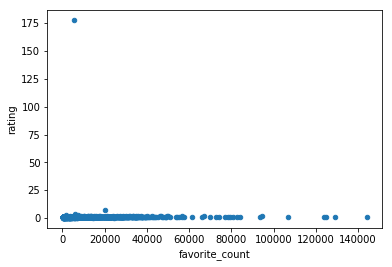

In [820]:
#create plot
twitter_archive_master.plot.scatter(x='favorite_count',y='rating')

In [821]:
#remove rating outliers
twitter_archive_master= twitter_archive_master[twitter_archive_master.rating <= 2]
twitter_archive_master= twitter_archive_master[twitter_archive_master.favorite_count <= 60000]

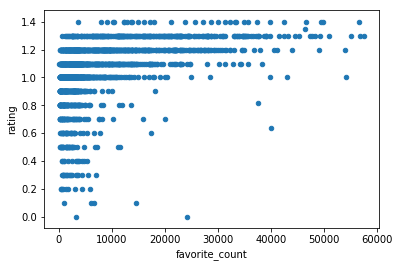

In [822]:
#create plot rating - likes
twitter_archive_master.plot.scatter(x='favorite_count',y='rating')

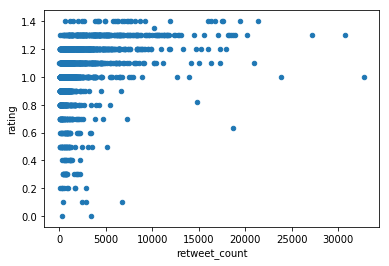

In [823]:
#relationship rating and retweet
twitter_archive_master.plot.scatter(x='retweet_count',y='rating')

In [826]:
#create plot
pd.set_option('display.max_colwidth', -1)
twitter_archive_master.source_x.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1913
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    10  
Name: source_x, dtype: int64

In [825]:
#As seen above, WeRateDogs is a heavy iPhone user - most of the tweets come from iPhone.

In [827]:
# Checking the types of breed with higest median rating

twitter_archive_master_by_p1=twitter_archive_master.groupby('p1')

In [834]:
twitter_archive_master_by_p1.rating.median().sort_values(ascending=False)


p1
Prison              1.40
Pedestal            1.40
Pole                1.40
Military Uniform    1.40
Limousine           1.40
Quilt               1.30
Upright             1.30
Bannister           1.30
Revolver            1.30
Barbell             1.30
Marmot              1.30
Restaurant          1.30
Snowmobile          1.30
Convertible         1.30
Orange              1.30
Canoe               1.30
Tiger Shark         1.30
Padlock             1.30
Cliff               1.30
Syringe             1.30
Loupe               1.30
Dough               1.30
Giant Schnauzer     1.30
Web Site            1.30
Hammer              1.30
Grille              1.30
Afghan Hound        1.30
Home Theater        1.30
Teapot              1.30
Saluki              1.30
                    ... 
Bee Eater           0.50
Stove               0.50
Pitcher             0.50
Boathouse           0.50
Fiddler Crab        0.50
Jellyfish           0.45
Frilled Lizard      0.40
Radio Telescope     0.40
Suit                0.

In [ ]:
twitter_archive_master.hist()


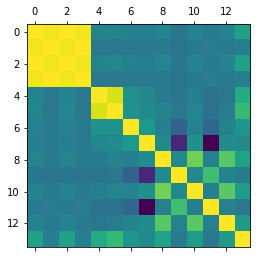

In [809]:
plt.matshow(twitter_archive_master.corr())

In [ ]:
#Save master file in csv format
twitter_archive_master.to_csv('twitter_archive_master')